In [1]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc


#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.transforms as transforms

from figurefirst import mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi

#misc
import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [2]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/algorithmv1.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout

df_test = pd.read_hdf('../../data/simulator/figure/Figure_hws/hws_jan22.h5')
dfres=pd.read_hdf("/home/vbl/DataAnalysis/data/simulator/algorithm/WindyMASigned.h5")
dirname = '../../data/simulator/figure/Figure_hws/'
hmap_data = np.load(str(dirname) + "hmap.npz")
    
fitted_p_heatmap=hmap_data['fitted_heatmap']
xedges=hmap_data['xedges']
yedges=hmap_data['yedges']

index = osc.get_index(dfres.odor,4.5)
whiff_initiation_points = [sub[0] for sub in index]
dfres['whiff_flag'] = 0

fdf=pd.read_hdf("/home/vbl/DataAnalysis/data/simulator/algorithm/whiff.h5")
# Set 1 for the specified indices in the 'whiff_flag' column
dfres.iloc[whiff_initiation_points, dfres.columns.get_loc('whiff_flag')] = 1

dfres['distance_along_streakline']=dfres.distance_along_streakline*dfres.xsign
dfres['nearest_from_streakline']=dfres.nearest_from_streakline*dfres.ysign

test_data = df_test[(df_test['time'] >= 337) & (df_test['time'] <= 339)]
test_data.reset_index(inplace=True, drop=True)

In [4]:
np.median(fdf.odor_intermittency)

0.03497576713562012

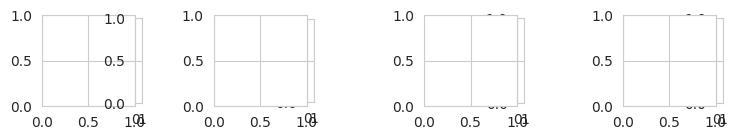

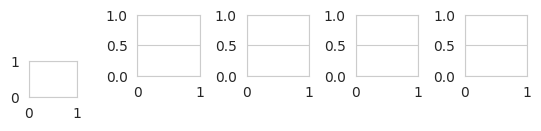

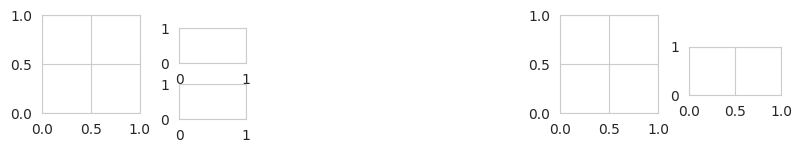

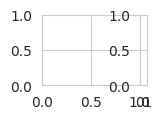

In [14]:
layout=load()

Illustration

input trajectory

In [7]:
ax=layout.axes[('fig_illustration','traj_illustration')]
num_arrows=10
arrow_size=0.1
color_gradient=False
x = test_data.distance_along_streakline.values
y = test_data.nearest_from_streakline.values

# Calculate cumulative distance along the path
dx = np.diff(x)
dy = np.diff(y)
distances = np.sqrt(dx**2 + dy**2)
cum_distances = np.concatenate(([0], np.cumsum(distances)))
total_distance = cum_distances[-1]

# Create points for arrowhead placement with overlap
arrow_distances = np.linspace(0, total_distance, num_arrows)

# Interpolate points for arrowheads
x_arrows = np.interp(arrow_distances, cum_distances, x)
y_arrows = np.interp(arrow_distances, cum_distances, y)

# Calculate directions for arrowheads
dx_arrows = np.gradient(x_arrows)
dy_arrows = np.gradient(y_arrows)
angles = np.arctan2(dy_arrows, dx_arrows)

# Create color gradient
if color_gradient:
    colors = plt.cm.Blues(np.linspace(0.3, 0.9, num_arrows))
else:
    colors = ['#1764ab'] * num_arrows

# Arrow shape
arrow_path = Path([
    [0, 0],           # tip
    [-3, -0.8],       # back left
    [-2.8, 0],        # back middle
    [-3, 0.86],        # back right
    [0, 0]           # back to tip
])

# Create and plot arrowheads
for i in range(num_arrows):
    patch = patches.PathPatch(
        arrow_path,
        facecolor=colors[i],
        edgecolor='none',
        transform=transforms.Affine2D()
            .scale(arrow_size)
            .rotate(angles[i])
            .translate(x_arrows[i], y_arrows[i])
            + ax.transData,
            rasterized=True, zorder=-10
    )
    ax.add_patch(patch)

# ax.set_aspect('equal')
ax.axis('off')

margin = arrow_size
ax.set_xlim(min(x) - margin, max(x) + margin)
ax.set_ylim(min(y) - margin, max(y) + margin)
ax.set_rasterization_zorder(-20)

ax.grid(False)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_illustration'], 'fig_illustration', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

data-trajectory

In [8]:
ax=layout.axes[('fig_illustration','traj_1')]
a1 = 40000
a2 = 120000
cax1 = ax.scatter(df_test.distance_along_streakline[a1:a2], df_test.nearest_from_streakline[a1:a2], c='black', s = 0.01, edgecolors=None,  
                   alpha=0.2, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('x')
ax.xaxis.set_label_coords(0.5, -0.3)
ax.set_ylabel('y')
ax.yaxis.set_label_coords(-0.10, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 3, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,25],
                           xticks=[0,45],
                           linewidth=0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_illustration'], 'fig_illustration', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

data - odor times series

In [9]:
ax=layout.axes[('fig_illustration','traj_odor_ts')]
a1 = 80000
a2 = 100000
# xlimT=[a1,a2]
ax.plot(df_test.time[a1:a2], df_test.odor[a1:a2], c='black', rasterized=True, linewidth=0.5)
xlimT=[415,418]

ax.set_xlim(415, 418)
ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[0,10.5],
                           xticks=xlimT,
                           linewidth=0.5)


time = df_test.time[a1:a2].values
odor = df_test.odor[a1:a2].values

# For whiffs (high values)
above_threshold = odor > 4.5
transitions = np.diff(above_threshold.astype(int))
whiff_starts = time[:-1][transitions == 1]
whiff_ends = time[:-1][transitions == -1]

ax.axvspan(whiff_starts[2], whiff_ends[2], ymin=0.07, ymax=0.95, alpha=0.2, color='orange', rasterized=True)
ax.axvspan(whiff_starts[3], whiff_ends[3], ymin=0.07, ymax=0.95, alpha=0.2, color='orange', rasterized=True)

ax.axvspan(415, 415.84, ymin=0.07, ymax=0.95, alpha=0.4, color='g', rasterized=True)
ax.axhline(4.5, linestyle='--', c='fuchsia', linewidth=0.4)
# ax.axvspan(416.15, 416.32, ymin=0.05, ymax=0.95, alpha=0.2, color='red', rasterized=True)

ax.grid(False)
ax.set_ylabel('odor')
ax.yaxis.set_label_coords(-0.10, 0.5)
ax.set_xlabel('time')
ax.xaxis.set_label_coords(0.5, -0.3)
ax.set_xticklabels([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_illustration'], 'fig_illustration', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

output trajectory

In [10]:
ax=layout.axes[('fig_illustration','traj_illustration_1')]
num_arrows=10
arrow_size=0.1
color_gradient=False

x = test_data.distance_along_streakline.values
y = test_data.nearest_from_streakline.values
odor_values = test_data.predicted_odor.values  # Get odor values

# Calculate cumulative distance along the path
dx = np.diff(x)
dy = np.diff(y)
distances = np.sqrt(dx**2 + dy**2)
cum_distances = np.concatenate(([0], np.cumsum(distances)))
total_distance = cum_distances[-1]

# Create points for arrowhead placement with overlap
arrow_distances = np.linspace(0, total_distance, num_arrows)

# Interpolate points for arrowheads
x_arrows = np.interp(arrow_distances, cum_distances, x)
y_arrows = np.interp(arrow_distances, cum_distances, y)
odor_arrows = np.interp(arrow_distances, cum_distances, odor_values)  # Interpolate odor values

# Calculate directions for arrowheads
dx_arrows = np.gradient(x_arrows)
dy_arrows = np.gradient(y_arrows)
angles = np.arctan2(dy_arrows, dx_arrows)

# Set colors based on odor threshold
colors = ['#bc141a' if odor > 4.5 else '#1764ab' for odor in odor_arrows]

# Arrow shape
arrow_path = Path([
    [0, 0],      # tip
    [-3, -0.8],  # back left
    [-2.8, 0],   # back middle
    [-3, 0.86],  # back right
    [0, 0]       # back to tip
])

# Create and plot arrowheads
for i in range(num_arrows):
    patch = patches.PathPatch(
        arrow_path,
        facecolor=colors[i],
        edgecolor='none',
        transform=transforms.Affine2D()
            .scale(arrow_size)
            .rotate(angles[i])
            .translate(x_arrows[i], y_arrows[i])
            + ax.transData,
        rasterized=True,
        zorder=-10
    )
    ax.add_patch(patch)

ax.set_aspect('equal')
ax.axis('off')
margin = arrow_size
ax.set_xlim(min(x) - margin, max(x) + margin)
ax.set_ylim(min(y) - margin, max(y) + margin)
ax.set_rasterization_zorder(-20)
ax.grid(False)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_illustration'], 'fig_illustration', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

output odor

In [11]:
ax=layout.axes[('fig_illustration','traj_illustration_odor')]
lim1=70 
lim2=228

ax.plot(test_data.time[:lim1], test_data.predicted_odor[:lim1], linewidth=0.5,c='#1764ab',  rasterized=True)
ax.plot(test_data.time[lim1:lim2], test_data.predicted_odor[lim1:lim2],linewidth=0.5, c='#bc141a', rasterized=True)
ax.plot(test_data.time[lim2:], test_data.predicted_odor[lim2:], linewidth=0.5,c='#1764ab',  rasterized=True)

ax.set_rasterization_zorder(-20)

xlimTs=[337.25,338.25]

# ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10.5],
                           xticks=[337,339],
                           linewidth=0.5)


for spine in ax.spines.values():
    spine.set_visible(False)

# Add back only the bottom spine
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['bottom'].set_linewidth(0.5)

# Set just the tick marks for y-axis without the connecting line
yticks = [0, 10.5]
for y in yticks:
    ax.plot([-5/72, 0], [y, y], 
            transform=ax.get_yaxis_transform(), 
            clip_on=False, 
            color='black', 
            linewidth=0.5)


ax.set_xlabel('2 s')
ax.xaxis.set_label_coords(0.5, -0.25)
# ax.set_ylabel('od$_{co}$')
# ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_illustration'], 'fig_illustration', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

Flow Diagram

In [210]:
n_bins_x = n_bins_y = 50
heatmap_whiff, xedges, yedges = np.histogram2d(
    dfres['distance_along_streakline'], 
    dfres['nearest_from_streakline'], 
    bins=[n_bins_x, n_bins_y], 
    weights=dfres['whiff_flag']
)

heatmap_total, _, _ = np.histogram2d(
    dfres['distance_along_streakline'], 
    dfres['nearest_from_streakline'], 
    bins=[n_bins_x, n_bins_y]
)

# Calculate empirical probabilities (Equation 1)
with np.errstate(divide='ignore', invalid='ignore'):
    heatmap_prob = np.divide(
        heatmap_whiff, 
        heatmap_total, 
        out=np.zeros_like(heatmap_whiff), 
        where=heatmap_total != 0
    )

Whiffs

In [211]:
ax=layout.axes[('fig1','ax1')]
cax = ax.imshow(
    heatmap_whiff.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=30, rasterized=True,
)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.12)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.ticklabel_format(useOffset=False)

# ax.set_ylim(-40,50)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [212]:
ax = layout.axes[('fig1', 'cbar1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$N(Whiffs)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '30'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

Visits

In [213]:
ax=layout.axes[('fig1','ax1_1')]
cax = ax.imshow(
    heatmap_total.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=1000, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('x, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.12, 0.5)

ax.ticklabel_format(useOffset=False)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [214]:
ax = layout.axes[('fig1', 'cbar2')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$N(Visits)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '1000'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

Probability of Onset

In [215]:
ax=layout.axes[('fig1','ax2')]
cax = ax.imshow(
    heatmap_prob.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=0.05, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('x, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.1, 0.5)

ax.ticklabel_format(useOffset=False)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [216]:
ax = layout.axes[('fig1', 'cbar3')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(wo|x,y)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '.01'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

Final Heatmap

In [217]:
ax=layout.axes[('fig1','ax4')]
cax = ax.imshow(
    fitted_p_heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=0.01, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('x, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.1, 0.5)

ax.ticklabel_format(useOffset=False)

# ax.set_ylim(-40,50)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [218]:
ax = layout.axes[('fig1', 'cbar5')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(wo|x,y)_{min}$",rotation=90, labelpad=-15, fontsize=6)

ax.set_yticklabels(['0', '.01'], fontsize=7)
ax.tick_params(axis='y', pad=1) 
# figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

Plot Intermediates

In [219]:
df_test =pd.read_hdf("/home/vbl/DataAnalysis/data/simulator/algorithm/hws_feb4_intermediates.h5") 

In [220]:
ax=layout.axes[('fig2','axbinary')]
ax.plot(df_test.time, df_test.whiff_predicted, linewidth=0.5,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('1 s')

ax.xaxis.set_label_coords(0.5, -0.3)

l=[332.1,333.1]

ax.set_xlim(l)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=l,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [221]:
xlimTs=[330,335]

ax=layout.axes[('fig2','axtarget')]
ax.plot(df_test.time, df_test.target_concentration, linewidth=0.5, c='black', rasterized=True)
ax.axhline(4.5, color='r', linestyle='--', linewidth= 0.5, rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
# ax.set_xlabel('1 s')

ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('odor, a.u.')
ax.yaxis.set_label_coords(-0.12, 0.5)

ax.set_xlim(331.5,332.5)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [222]:
xlimTs=[330,335]

ax=layout.axes[('fig2','ax5')]
ax.plot(df_test.time, df_test.logistic_transform, linewidth=0.5,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
# xlimTs=[138,143]
ax.set_xticklabels([])

ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.2)
# ax.set_ylabel('odor, a.u.')
# ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlim(xlimTs)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [223]:
ax=layout.axes[('fig2','ax6')]
ax.plot(df_test.time, df_test.ar2_output, linewidth=0.5,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylim(-10,20)
ax.set_xlim(xlimTs)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,0,10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

In [224]:
ax=layout.axes[('fig2','ax7')]
ax.plot(df_test.time, df_test.predicted_odor, linewidth=1,c='black', rasterized=True)
ax.axhline(4.5, color='r', linestyle='--', linewidth= 0.5, rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.2)

ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,0,10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')

Intermittency

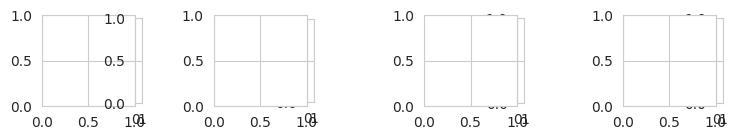

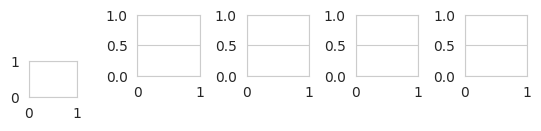

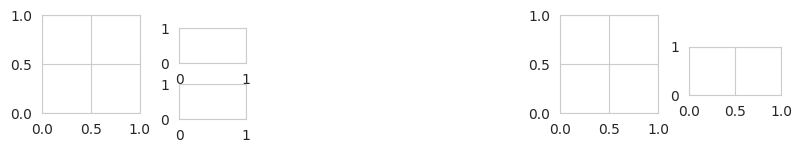

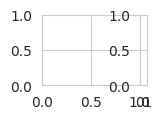

In [29]:
layout=load()

In [30]:
x_bins = np.arange(0, 51, 5)
y_bins = np.arange(-15, 16, 5)

# Calculate mean intermittency for each bin
mean_intermittency = np.zeros((len(y_bins)-1, len(x_bins)-1))

for i in range(len(x_bins)-1):
    for j in range(len(y_bins)-1):
        mask = ((fdf.avg_distance_along_streakline >= x_bins[i]) & 
                (fdf.avg_distance_along_streakline < x_bins[i+1]) &
                (fdf.avg_nearest_from_streakline >= y_bins[j]) & 
                (fdf.avg_nearest_from_streakline < y_bins[j+1]))
        if mask.any():
            mean_intermittency[j, i] = fdf[mask].odor_intermittency.mean()
        else:
            mean_intermittency[j, i] = np.nan

In [31]:
ax=layout.axes[('fig_inter','inter_ax')]
# im = ax.imshow(mean_intermittency, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],
#                    origin='lower',
#                    aspect='auto',
#                    cmap='RdYlBu_r',
#                    vmin=0,
#                    vmax=2, rasterized=True)
ax.scatter(fdf.avg_distance_along_streakline,fdf.avg_nearest_from_streakline, c=fdf.odor_intermittency, 
           cmap='viridis',s=0.5,vmin=0,vmax=2, rasterized=True)

ax.set_rasterization_zorder(-20)


for x in x_bins:
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.1,alpha=1, rasterized=True)
for y in y_bins:
    ax.axhline(y=y, color='black', linestyle='--', linewidth=0.1, alpha=1, rasterized=True)


ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.10, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,-10,15],
                           xticks=[0,5,50],
                           linewidth=0.5)


# ax.set_xticklabels([])
# ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_inter'], 'fig_inter', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')


In [32]:

ax = layout.axes[('fig_inter', 'cbar_inter')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='viridis', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("Intermittency, s",rotation=90, labelpad=-20)

ax.set_yticklabels(['0', '2'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig_inter'], 'fig_inter', cleartarget=True)
layout.write_svg('../../Figure2/algorithmv1.svg')